In [1]:
%cd -q ../..
import json
from collections import Counter, defaultdict
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

### Relative Frequency of Category over Time

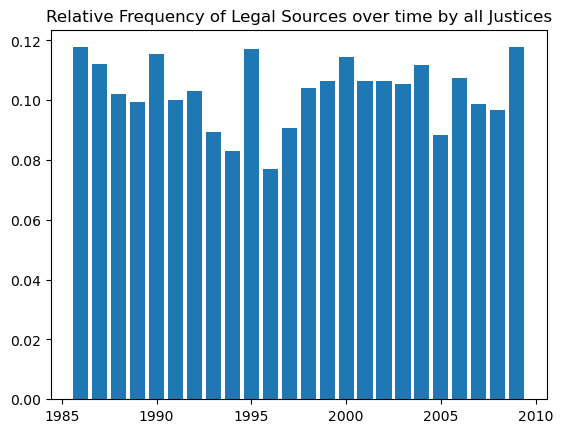

In [2]:
year_token_counts = Counter()
year_positive_prediction_counts = defaultdict(lambda: {"ft": 0, "mc": 0, "dq": 0, "les": 0})
for opinion_path in Path("data/harvard_cap").glob("*/*.json"):
    with open(opinion_path, "r") as f:
        case = json.load(f)
        year = int(case["decision_date"][:4])
    origin_dir = opinion_path.parent.name
    filename = opinion_path.stem + ".txt"
    prediction_path = Path("data/cap_predictions", origin_dir, filename)
    try:
        predictions = np.loadtxt(prediction_path)
    except FileNotFoundError:
        continue
    num_tokens = len(predictions)
    threshold = .5
    thresholded_predictions = predictions > threshold
    category_counts = np.sum(thresholded_predictions, axis=0)
    year_token_counts[year] += num_tokens
    for i, cat in enumerate(["ft", "mc", "les", "dq"]):
        year_positive_prediction_counts[year][cat] += category_counts[i]
relative_frequencies = {"ft": {}, "mc": {}, "dq": {}, "les": {}}
for year, token_count in year_token_counts.items():
    for cat in ["ft", "mc", "les", "dq"]:
        relative_frequencies[cat][year] = year_positive_prediction_counts[year][cat] / token_count
plt.bar(relative_frequencies["les"].keys(), relative_frequencies["les"].values())
plt.title("Relative Frequency of Legal Sources over time by all Justices")
plt.show()

### Relative Frequency by Author


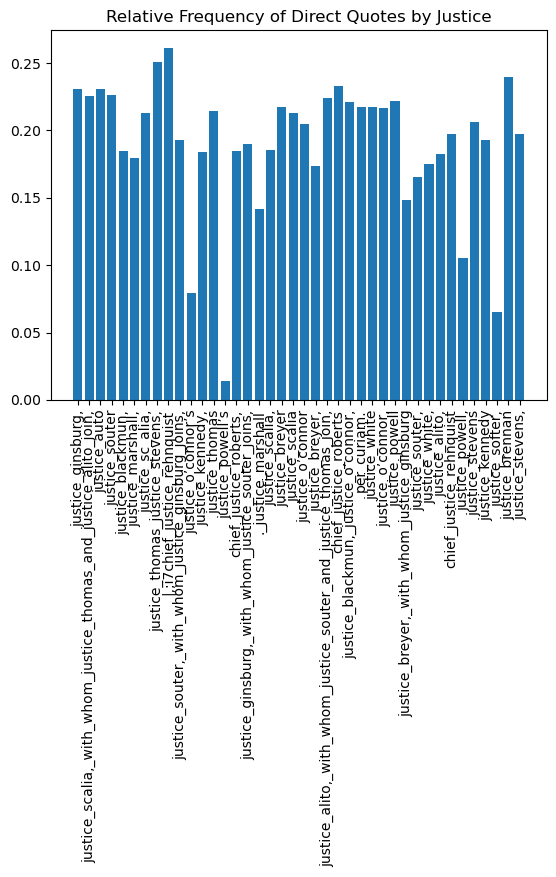

In [3]:
author_token_counts = Counter()
positive_prediction_counts = defaultdict(lambda: {"ft": 0, "mc": 0, "dq": 0, "les": 0})
for opinion_path in Path("data/harvard_cap").glob("*/*.json"):
    author = opinion_path.parent.name
    filename = opinion_path.stem + ".txt"
    prediction_path = Path("data/cap_predictions", author, filename)
    try:
        predictions = np.loadtxt(prediction_path)
    except FileNotFoundError:
        continue
    num_tokens = len(predictions)
    threshold = .5
    thresholded_predictions = predictions > threshold
    category_counts = np.sum(thresholded_predictions, axis=0)
    author_token_counts[author] += num_tokens
    for i, cat in enumerate(["ft", "mc", "les", "dq"]):
        positive_prediction_counts[author][cat] += category_counts[i]
relative_frequencies = {"ft": {}, "mc": {}, "dq": {}, "les": {}}
for author, token_count in author_token_counts.items():
    for cat in ["ft", "mc", "les", "dq"]:
        relative_frequencies[cat][author] = positive_prediction_counts[author][cat] / token_count
plt.bar(relative_frequencies["dq"].keys(), relative_frequencies["dq"].values())
plt.xticks(rotation=90)
plt.title("Relative Frequency of Direct Quotes by Justice")
plt.show()

### Opinion length by justice

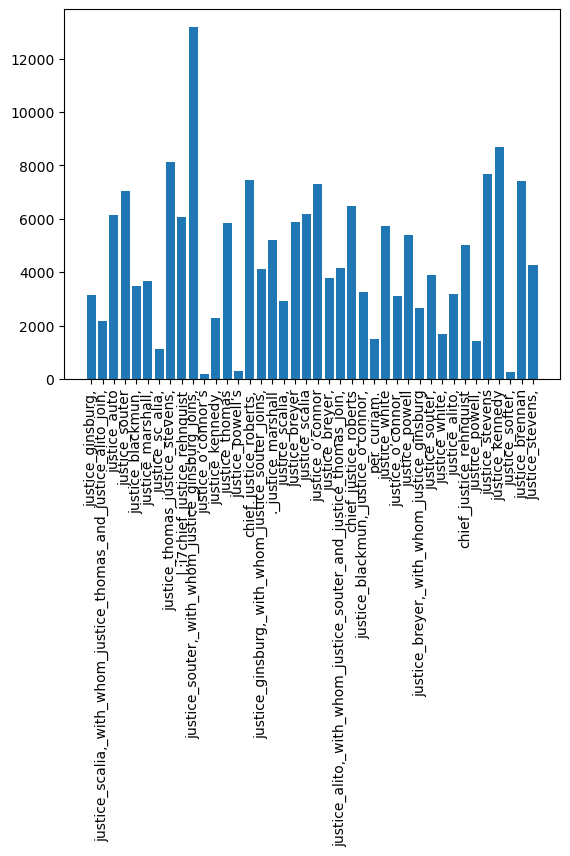

In [4]:
author_token_counts = Counter()
author_opinion_counts = Counter()
for opinion_path in Path("data/harvard_cap").glob("*/*.json"):
    author = opinion_path.parent.name
    filename = opinion_path.stem + ".txt"
    prediction_path = Path("data/cap_predictions", author, filename)
    try:
        predictions = np.loadtxt(prediction_path)
    except FileNotFoundError:
        continue
    num_tokens = len(predictions)
    author_token_counts[author] += num_tokens
    author_opinion_counts[author] += 1

avg_length_by_author = {}
for author, token_count in author_token_counts.items():
    avg_length_by_author[author] = token_count / author_opinion_counts[author]
    
plt.bar(avg_length_by_author.keys(), avg_length_by_author.values())
plt.xticks(rotation=90)
plt.show()